In [1]:
import os
import sys
from collections import OrderedDict
sys.path.append("../..")
import spatialpy
spatialpy.__file__
import matplotlib.pyplot as plt
import numpy
%load_ext autoreload
%autoreload 2

In [2]:
class All(spatialpy.Geometry):
    def inside(self, x, on_boundary):
        if x[0] < 0.0 or x[0] > 1.0 or \
           x[1] < 0.0 or x[1] > 1.0:
            return True
        return False

In [3]:
class turingPattern(spatialpy.Model):

   def __init__(self, model_name="turingPattern"):
        spatialpy.Model.__init__(self, model_name)

        diff_const = 0.1
   
        A = spatialpy.Species(name="A", diffusion_constant=diff_const)
        B = spatialpy.Species(name="B", diffusion_constant=diff_const)
        D = spatialpy.Species(name="D", diffusion_constant=diff_const)
        E = spatialpy.Species(name="E", diffusion_constant=diff_const)
        X = spatialpy.Species(name="X", diffusion_constant=diff_const)
        Y = spatialpy.Species(name="Y", diffusion_constant=diff_const)
        self.add_species([A,B,D,E,X,Y])

        self.mesh = spatialpy.Mesh.create_2D_domain(nx=30, ny=30, xlim=[-1, 1], ylim=[-1, 1], fixed=True)

        self.set_type(All(), 1)

        Rate1 = spatialpy.Parameter("Rate1", expression=5000.0)
        Rate2 = spatialpy.Parameter("Rate2", expression=50.0)
        Rate3 = spatialpy.Parameter("Rate3", expression=0.0005)
        Rate4 = spatialpy.Parameter("Rate4", expression=5.0)
        self.add_parameter([Rate1, Rate2, Rate3, Rate4])

        Reaction1 = spatialpy.Reaction(reactants={}, products={X:1}, rate=Rate1)
        Reaction2 = spatialpy.Reaction(reactants={B:1, X:1}, products={Y:1, D:1}, propensity_function="(Rate2 * B * X)/vol")
        Reaction3 = spatialpy.Reaction(reactants={X:2, Y:1}, products={X:3}, propensity_function="(((Rate3 * X * (X-1))/2)* Y)/vol")
        Reaction4 = spatialpy.Reaction(reactants={X:1}, products={E:1}, propensity_function="Rate4 * X")
        self.add_reaction([Reaction1, Reaction2, Reaction3, Reaction4])

        #self.add_initial_condition(spatialpy.ScatterCondition(A, 200, [1]))
        self.add_initial_condition(spatialpy.ScatterCondition(B, 200, [1]))
        self.add_initial_condition(spatialpy.ScatterCondition(D, 20, [1]))
        self.add_initial_condition(spatialpy.ScatterCondition(E, 20, [1]))
        self.add_initial_condition(spatialpy.ScatterCondition(X, 20, [1]))
        self.add_initial_condition(spatialpy.ScatterCondition(Y, 20, [1]))

        self.staticDomain = True

        self.timespan(range(0,10))

In [4]:
model = turingPattern()

In [27]:
print(list(range(0,10)))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [5]:
from spatialpy import Solver
sol = Solver(model, debug_level=0)
sol.compile()
%time result = sol.run()

CPU times: user 60 ms, sys: 9.83 ms, total: 69.8 ms
Wall time: 1h 5min 22s


In [14]:
speciesX = result.get_species("X")

In [17]:
speciesX.sum(axis=1)

array([1.800000e+04, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       3.000000e+00, 1.290112e+06])

In [23]:
result.plot_species("X", t_ndx_list=[0,1,2,3,4,5,7,8,9], animated=True)

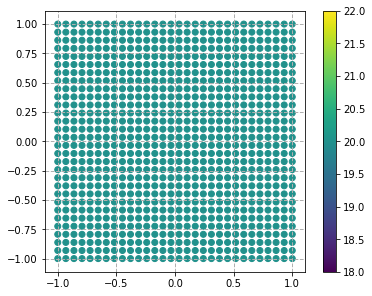

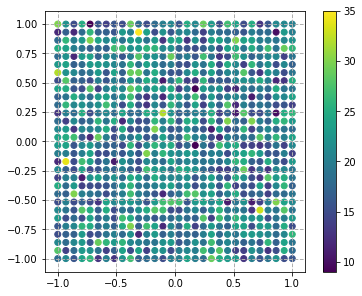

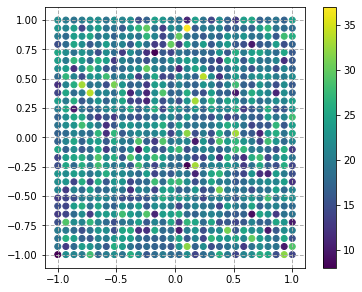

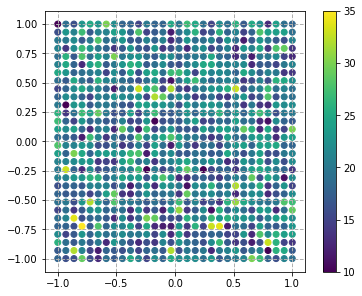

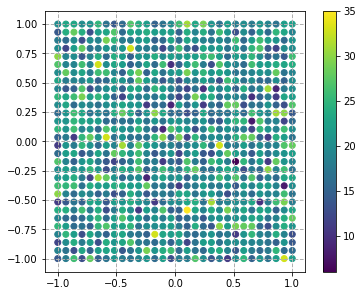

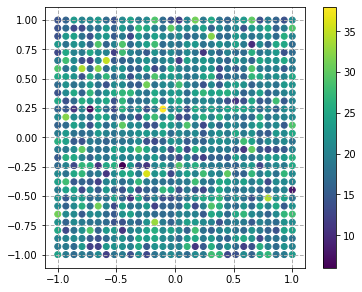

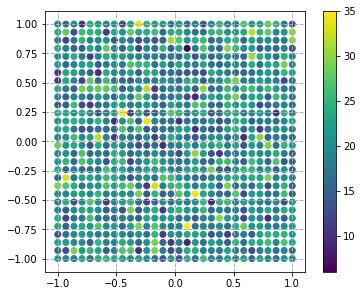

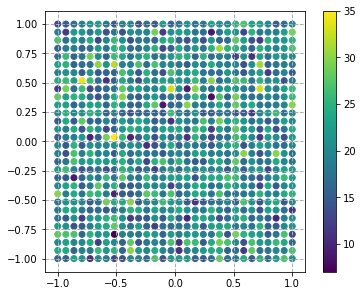

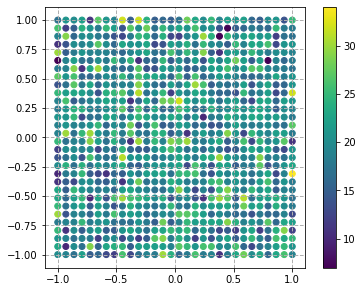

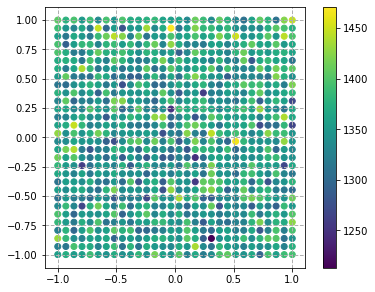

In [12]:
for i,t in enumerate(result.get_timespan()):
    #print(i,t)
    result.plot_species("E", i, use_matplotlib=True)